## 4_TensorRT_Inference_Test

This notebook would run a test inference on the TensorRT engine that was created in notebook 3.


In [1]:
#Import Packages
import numpy as np
from onnx_helper import ONNXClassifierWrapper,convert_onnx_to_engine
import torch
import json
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Set constants
BATCH_SIZE=1
N_CLASSES=1000
PRECISION=np.float32
image_size=224
TRT_PATH='efficientnetb2_batch1.trt'

In [8]:
print("Loading TRT")

trt_model=ONNXClassifierWrapper(TRT_PATH,[BATCH_SIZE,N_CLASSES],target_dtype=PRECISION)



Loading TRT


### It is important to note that TensorRT engine expects the input to be [Batch, Height, Width, Channels]
##### Hence in the below step, it is transposed to be of such dimensions.

In [9]:
img=Image.open('images/cat_1.jpg')
test_image=np.copy(img)

image_size=224
tfms=transforms.Compose([transforms.Resize(image_size),
                         transforms.CenterCrop(image_size),
                         transforms.ToTensor(),
                         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
img=tfms(img)
img=img.unsqueeze(0)
print("Img shape",img.shape)
BATCH_SIZE=1
dummy_batch=img.numpy()
#np.zeros((BATCH_SIZE,3,224,224))
#for idx in range(BATCH_SIZE):
#    dummy_batch[idx]=img.numpy
#print(dummy_batch.shape)
dummy_batch=dummy_batch.transpose((0,3,2, 1))
#print(dummy_batch.shape)


Img shape torch.Size([1, 3, 224, 224])


In [10]:
#dummy_batch=np.zeros((BATCH_SIZE,224,224,3))
print("Predict")
predictions=trt_model.predict(dummy_batch)
#print("Prediction",predictions)

Predict


In [11]:
labels_map=json.load(open('labels_map.txt'))
labels_map=[labels_map[str(i)] for i in range(1000)]

In [12]:
predt=torch.from_numpy(predictions)
#print(predt)
preds=torch.topk(predt,k=1).indices.squeeze(0).tolist()
#print(preds)

tabby, tabby cat                                                            (73.04%)


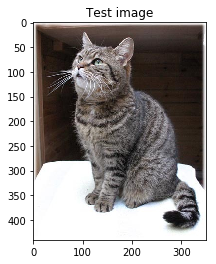

In [13]:
for idx in preds:
#idx = [int(idx) for idx in preds]
    
    label=labels_map[idx]
    prob=torch.softmax(predt,dim=1)[0,idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))
    
plt.imshow(test_image)
plt.title('Test image')
plt.show()    